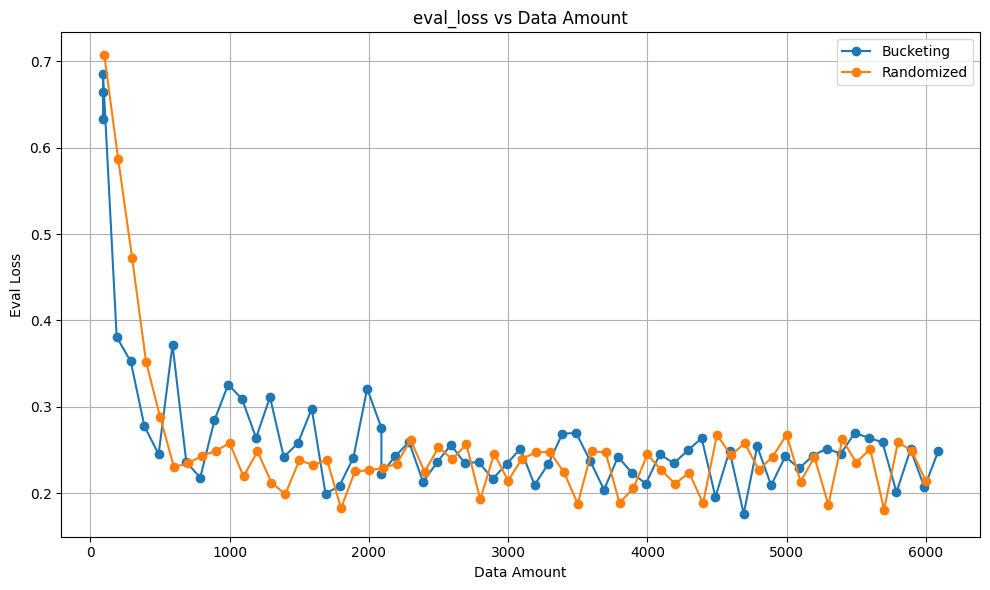

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
excel_file = "results.xlsx"  # path to your file
metric = "eval_loss"     # change this to any column you want to plot

# === LOAD DATA ===
df = pd.read_excel(excel_file)

# Ensure numeric values (in case of commas instead of dots)
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = df[col].str.replace(",", ".").astype(float)
        except Exception:
            pass

# === PLOT ===
plt.figure(figsize=(10, 6))


# Plot each method separately
for method, subset in df.groupby("method"):
    plt.plot(
        subset["data_amount"],
        subset[metric],
        marker="o",
        label=method
    )

plt.title(f"{metric} vs Data Amount")
plt.xlabel("Data Amount")
plt.ylabel(metric.replace("_", " ").title())
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


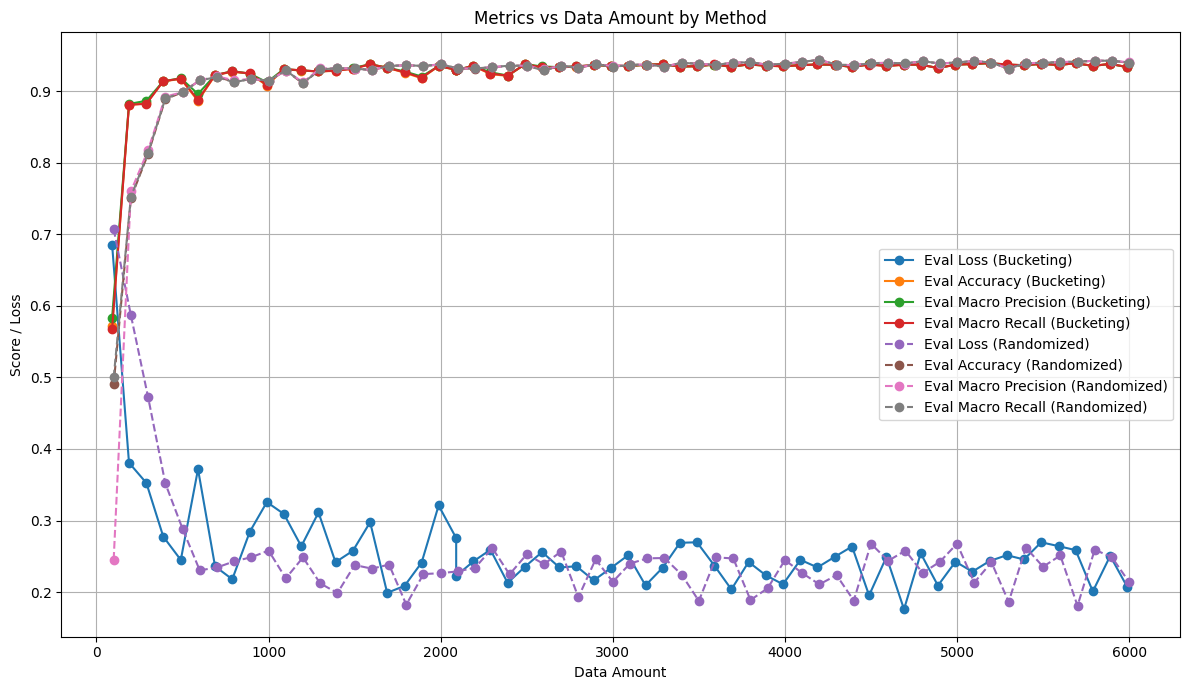

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data and fix decimal commas
excel_file = "results.xlsx"
df = pd.read_excel(excel_file, converters={
    'eval_loss': lambda x: float(str(x).replace(',', '.')),
    'eval_accuracy': lambda x: float(str(x).replace(',', '.')),
    'eval_macro_precision': lambda x: float(str(x).replace(',', '.')),
    'eval_macro_recall': lambda x: float(str(x).replace(',', '.')),
    'eval_macro_f1': lambda x: float(str(x).replace(',', '.')),
    'eval_negative_precision': lambda x: float(str(x).replace(',', '.')),
    'eval_negative_recall': lambda x: float(str(x).replace(',', '.')),
    'eval_negative_f1': lambda x: float(str(x).replace(',', '.')),
    'eval_positive_precision': lambda x: float(str(x).replace(',', '.')),
    'eval_positive_recall': lambda x: float(str(x).replace(',', '.')),
    'eval_positive_f1': lambda x: float(str(x).replace(',', '.'))
})

# Sort data by data_amount
df = df.sort_values(by="data_amount")

metrics = ["eval_loss", "eval_accuracy", "eval_macro_precision", "eval_macro_recall"]

plt.figure(figsize=(12, 7))

# Plot each method separately
for method in df['method'].unique():
    df_method = df[df['method'] == method]
    for metric in metrics:
        plt.plot(
            df_method['data_amount'],
            df_method[metric],
            marker='o',
            linestyle='-' if method == 'Bucketing' else '--',
            label=f"{metric.replace('_',' ').title()} ({method})"
        )

plt.title("Metrics vs Data Amount by Method")
plt.xlabel("Data Amount")
plt.ylabel("Score / Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
